In [78]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [19]:
path = pathlib.Path()
files = list(path.glob("*.dill"))

In [ ]:
with open(files[0],'rb'):
    pickle

PosixPath('noise_10.0_dt_0.04000000000000001.dill')

In [79]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f.name,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [80]:
results = [parse_file(f) for f in files]

In [81]:
df = pd.DataFrame(results)
df = df.astype('float')

In [82]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.384615,0.714286,0.500000,2.895287,16.666658,5.017116,772.642883,27.796454,17.523750,163.812385,0.198605,0.445580,10.0,0.04
1,0.368421,1.000000,0.538462,1.648092,9.487205,4.117480,2531.534180,50.314355,28.517932,414.732769,0.650722,0.806545,20.0,0.20
2,0.350000,1.000000,0.518519,9.154091,52.695322,18.473278,31675.912109,177.977282,74.988423,1907.158300,8.142186,2.852997,8.0,0.16
3,0.857143,0.857143,0.857143,0.279643,1.609758,0.500112,29.799374,5.458880,3.791805,25.634666,0.007660,0.087506,2.0,0.10
4,0.269231,1.000000,0.424242,8.647754,49.780606,17.203063,3383.152344,58.164872,31.711268,478.913572,0.869628,0.932390,12.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.333333,1.000000,0.500000,2.150152,12.377302,5.435241,13499.422852,116.187018,68.477637,720.686798,3.469981,1.862492,20.0,0.10
106,0.750000,0.857143,0.800000,0.337652,1.943684,0.668427,74.381729,8.624484,5.919038,37.532723,0.019120,0.138251,14.0,0.04
107,0.304348,1.000000,0.466667,3.155845,18.166550,9.305032,85088.953125,291.700107,155.096204,2537.642046,21.871828,4.675987,20.0,0.08
108,0.318182,1.000000,0.482759,1.751840,10.084427,4.818391,119374.765625,345.506539,149.449237,2809.449704,30.684881,5.538510,16.0,0.06


<Axes: xlabel='noise', ylabel='dt'>

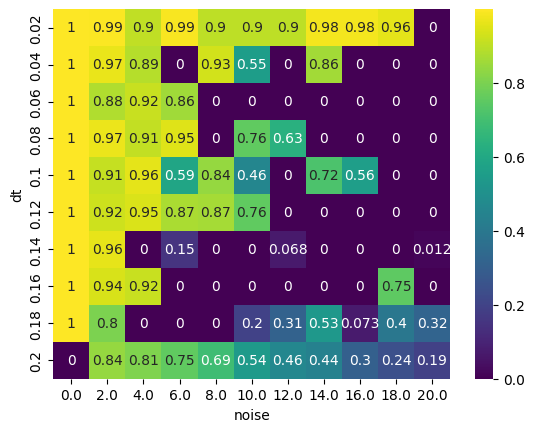

In [86]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='relative_l2_error')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
